In [1]:
import altair as alt
import pandas as pd

In [2]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

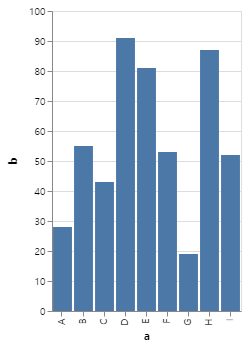

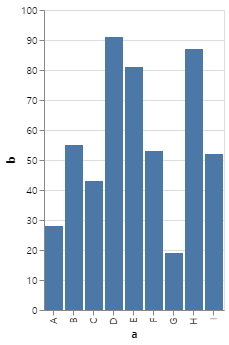

In [3]:
source = pd.DataFrame({'a':['A','B','C','D','E','F','G','H','I'],
                      'b':[28,55,43,91,81,53,19,87,52]})
alt.Chart(source).mark_bar().encode(x='a', y='b')

## (1번) Grouped Bar Chart

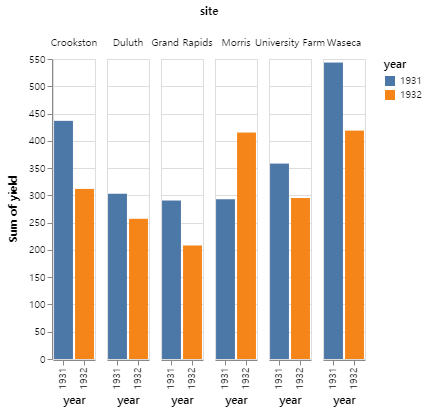

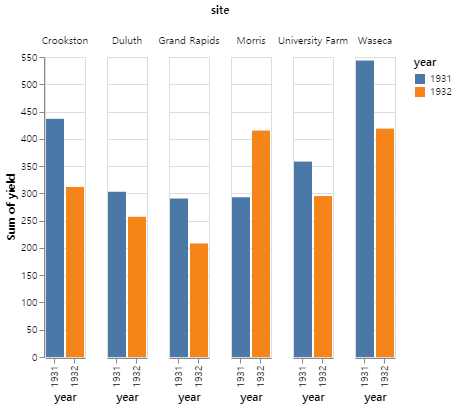

In [4]:
import altair as alt
from vega_datasets import data

source = data.barley()

alt.Chart(source).mark_bar().encode(
    x='year:O',
    y='sum(yield):Q',
    color='year:N',
    column='site:N'
)

## (2번) Horizion Graph 

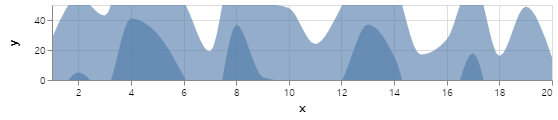

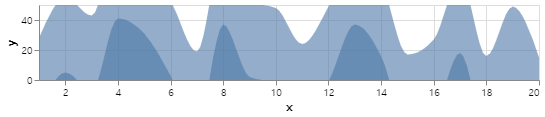

In [5]:
source = pd.DataFrame([
    {"x": 1,  "y": 28}, {"x": 2,  "y": 55},
    {"x": 3,  "y": 43}, {"x": 4,  "y": 91},
    {"x": 5,  "y": 81}, {"x": 6,  "y": 53},
    {"x": 7,  "y": 19}, {"x": 8,  "y": 87},
    {"x": 9,  "y": 52}, {"x": 10, "y": 48},
    {"x": 11, "y": 24}, {"x": 12, "y": 49},
    {"x": 13, "y": 87}, {"x": 14, "y": 66},
    {"x": 15, "y": 17}, {"x": 16, "y": 27},
    {"x": 17, "y": 68}, {"x": 18, "y": 16},
    {"x": 19, "y": 49}, {"x": 20, "y": 15}
])

area1 = alt.Chart(source).mark_area(
    clip=True,
    interpolate='monotone'
).encode(
    alt.X('x', scale=alt.Scale(zero=False, nice=False)),
    alt.Y('y', scale=alt.Scale(domain=[0, 50]), title='y'),
    opacity=alt.value(0.6)
).properties(
    width=500,
    height=75
)

area2 = area1.encode(
    alt.Y('ny:Q', scale=alt.Scale(domain=[0, 50]))
).transform_calculate(
    "ny", alt.datum.y - 50
)

area1 + area2

## (3번) Interactive Average

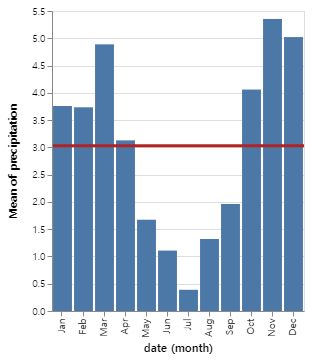

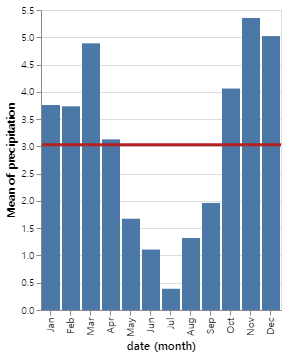

In [6]:
source = data.seattle_weather()
brush = alt.selection(type='interval', encodings=['x'])

bars = alt.Chart().mark_bar().encode(
    x='month(date):O',
    y='mean(precipitation):Q',
    opacity=alt.condition(brush, alt.OpacityValue(1), alt.OpacityValue(0.7)),
).add_selection(
    brush
)

line = alt.Chart().mark_rule(color='firebrick').encode(
    y='mean(precipitation):Q',
    size=alt.SizeValue(3)
).transform_filter(
    brush
)

alt.layer(bars, line, data=source)

## (4번) Error Bars Showing Confidence Interval

In [7]:
import altair as alt
from vega_datasets import data

source = data.barley()

error_bars = alt.Chart(source).mark_errorbar(extent='ci').encode(
  x=alt.X('yield:Q', scale=alt.Scale(zero=False)),
  y=alt.Y('variety:N')
)

points = alt.Chart(source).mark_point(filled=True, color='black').encode(
  x=alt.X('yield:Q', aggregate='mean'),
  y=alt.Y('variety:N'),
)

error_bars + points

AttributeError: 'Chart' object has no attribute 'mark_errorbar'